# A recommendation engine for books

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We start by importing our datasets:

In [3]:
books = pd.read_csv("data/Books.csv", dtype={3: str})  # string column 3 also contains float to signify NaN, thus specify with dtype
books = books.dropna()
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [4]:
users = pd.read_csv("data/Users.csv", index_col='User-ID')

# split location column in different components
location_split = users['Location'].str.split(',', expand=True)

if location_split.shape[1] < 3:
    location_split[2] = np.nan
if location_split.shape[1] > 3:
    location_split = location_split.iloc[:, :3]
    
location_split.columns = ['city', 'state', 'country']
users = users.drop(columns=['Location']).join(location_split)

users

,Age,city,state,country
User-ID,,,,
1,NaN,nyc,new york,usa
2,18.0,stockton,california,usa
3,NaN,moscow,yukon territory,russia
4,17.0,porto,v.n.gaia,portugal
5,NaN,farnborough,hants,united kingdom
...,...,...,...,...
278854,NaN,portland,oregon,usa
278855,50.0,tacoma,washington,united kingdom
278856,NaN,brampton,ontario,canada


The final data set contains explicit user feedback from $0$ (worst) to $10$ (best):

In [5]:
ratings = pd.read_csv("data/Ratings.csv")
ratings



,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


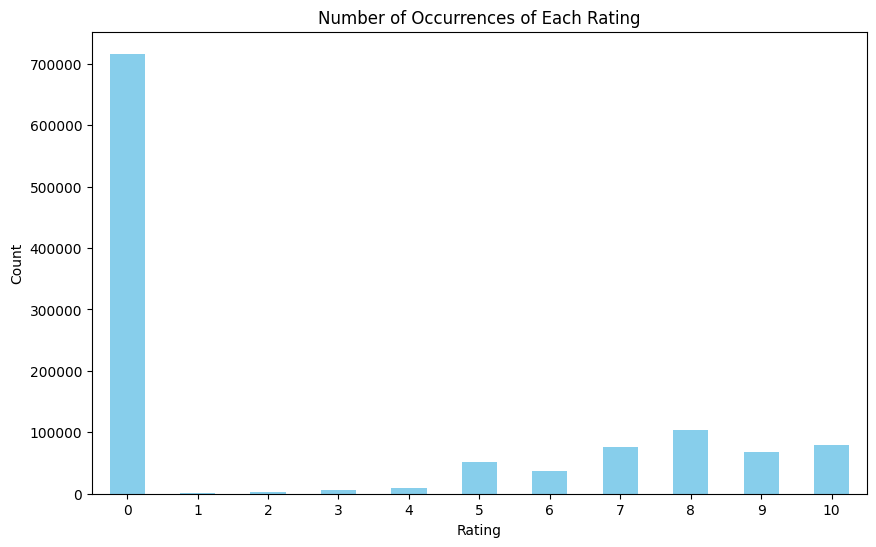

In [6]:
rating_counts = ratings['Book-Rating'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Occurrences of Each Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()